$$NWRITE = 500$$

$$dt = 0.004$$

Total run time was varied using 

$$\frac{t_{total}}{dt} = NSTEPS$$

In [83]:
import os
import glob

# Get all files in the "data" directory that match the pattern
all_files = sorted(glob.glob("data_500/time*.d")) # x in data_x denotes total run time in picoseconds

# Extract numbers by splitting the filename and converting to integers
all_numbers = [int(f.split("time")[1].split(".d")[0]) for f in all_files] # these will be our times for the MSD plot

# Sort both lists based on the numeric values
all_files.sort(key=lambda x: int(x.split("time")[1].split(".d")[0]))

print(all_files)
print(all_numbers) # times in ps (i.e. 0 ps, 2 ps, ..., 100 ps) since I write every 500 and have a dt = 0.004 --> 500 * 0.004 [ps] = write every 2 [ps]

['data_500/time000.d', 'data_500/time002.d', 'data_500/time004.d', 'data_500/time006.d', 'data_500/time008.d', 'data_500/time010.d', 'data_500/time012.d', 'data_500/time014.d', 'data_500/time016.d', 'data_500/time018.d', 'data_500/time020.d', 'data_500/time022.d', 'data_500/time024.d', 'data_500/time026.d', 'data_500/time028.d', 'data_500/time030.d', 'data_500/time032.d', 'data_500/time034.d', 'data_500/time036.d', 'data_500/time038.d', 'data_500/time040.d', 'data_500/time042.d', 'data_500/time044.d', 'data_500/time046.d', 'data_500/time048.d', 'data_500/time050.d', 'data_500/time052.d', 'data_500/time054.d', 'data_500/time056.d', 'data_500/time058.d', 'data_500/time060.d', 'data_500/time062.d', 'data_500/time064.d', 'data_500/time066.d', 'data_500/time068.d', 'data_500/time070.d', 'data_500/time072.d', 'data_500/time074.d', 'data_500/time076.d', 'data_500/time078.d', 'data_500/time080.d', 'data_500/time082.d', 'data_500/time084.d', 'data_500/time086.d', 'data_500/time088.d', 'data_500

In [84]:
import numpy as np
import matplotlib.pyplot as plt

x_index = 2
y_index = 3
z_index = 4

x_disp_index = 12
y_disp_index = 13
z_disp_index = 14

msd_values = []
time_steps = []

for i, file in enumerate(all_files):

    time_steps.append(all_numbers[i])
    
    data = np.loadtxt(file)

    x_disp = data[:, x_disp_index]
    y_disp = data[:, y_disp_index]
    z_disp = data[:, z_disp_index]

    squared_disp = x_disp**2 + y_disp**2 + z_disp**2

    msd = np.mean(squared_disp)
    msd_values.append(msd)


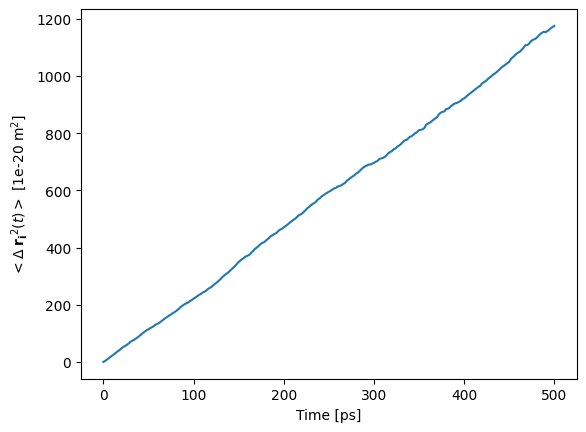

In [85]:
# Convert to numpy arrays
time_steps = np.asarray(time_steps)
msd_values = np.asarray(msd_values)

plt.plot(time_steps, msd_values)
plt.xlabel("Time [ps]")
plt.ylabel(r"$<{\Delta \; \mathbf{r_i}^2 (t)}>$ [1e-20 m$^2$]")
plt.show();

$$ MSD = \braket{\Delta \mathbf{r}^2 (t)} = A + 6Dt + \delta $$

where $\delta$ denotes fluctuations

In [86]:
slope, intercept = np.polyfit(time_steps, msd_values, 1)  # Linear fit: polyfit returns degree, degree - 1, degree - 2, ..., 0 

D = slope/6

a2_per_pico_to_cm2_per_second = 10**(-4)

print(f"My diffusion coefficient is {D:.3e} Angstrom^2 per picosecond")
print(f"or {D*a2_per_pico_to_cm2_per_second:.3e} cm^2 per second")

My diffusion coefficient is 3.912e-01 Angstrom^2 per picosecond
or 3.912e-05 cm^2 per second
